### Scores for bias Gen


Final_Test_MetricsBase_CNN
           precision    recall  f1-score
cloth       0.840376  0.895000  0.866828
no_face     0.882051  0.855721  0.868687
surgical    0.774510  0.793970  0.784119
n95         0.848485  0.840000  0.844221
incorrect   0.900000  0.855000  0.876923
Overall acc:  0.848


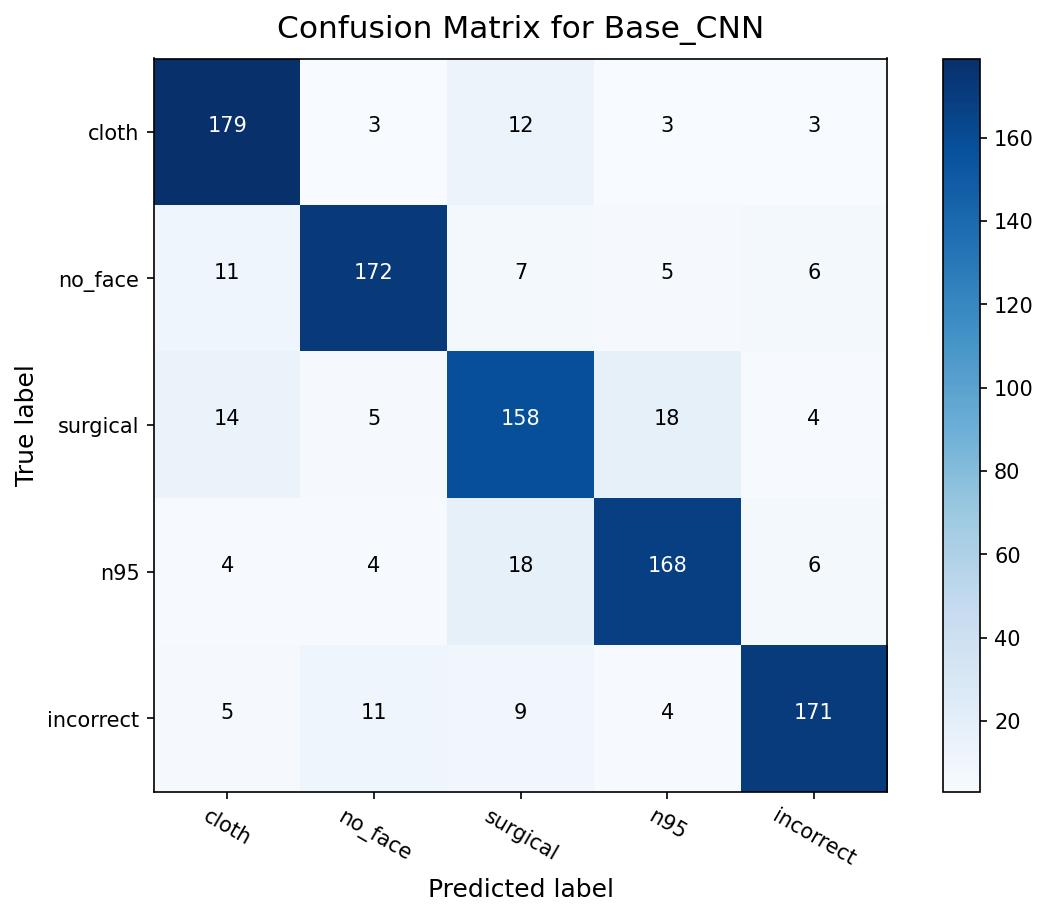

Final_Test_MetricsBase_CNN
              precision    recall  f1-score
cloth_m        0.795181  0.942857  0.862745
cloth_fm       0.869231  0.869231  0.869231
no_face_m      0.919540  0.792079  0.851064
no_face_fm     0.851852  0.920000  0.884615
surgical_m     0.785714  0.797101  0.791367
surgical_fm    0.768657  0.792308  0.780303
n95_m          0.818182  0.890110  0.852632
n95_fm         0.878788  0.798165  0.836538
incorrect_m    0.893333  0.807229  0.848101
incorrect_fm   0.904348  0.888889  0.896552
Overall acc:  0.848


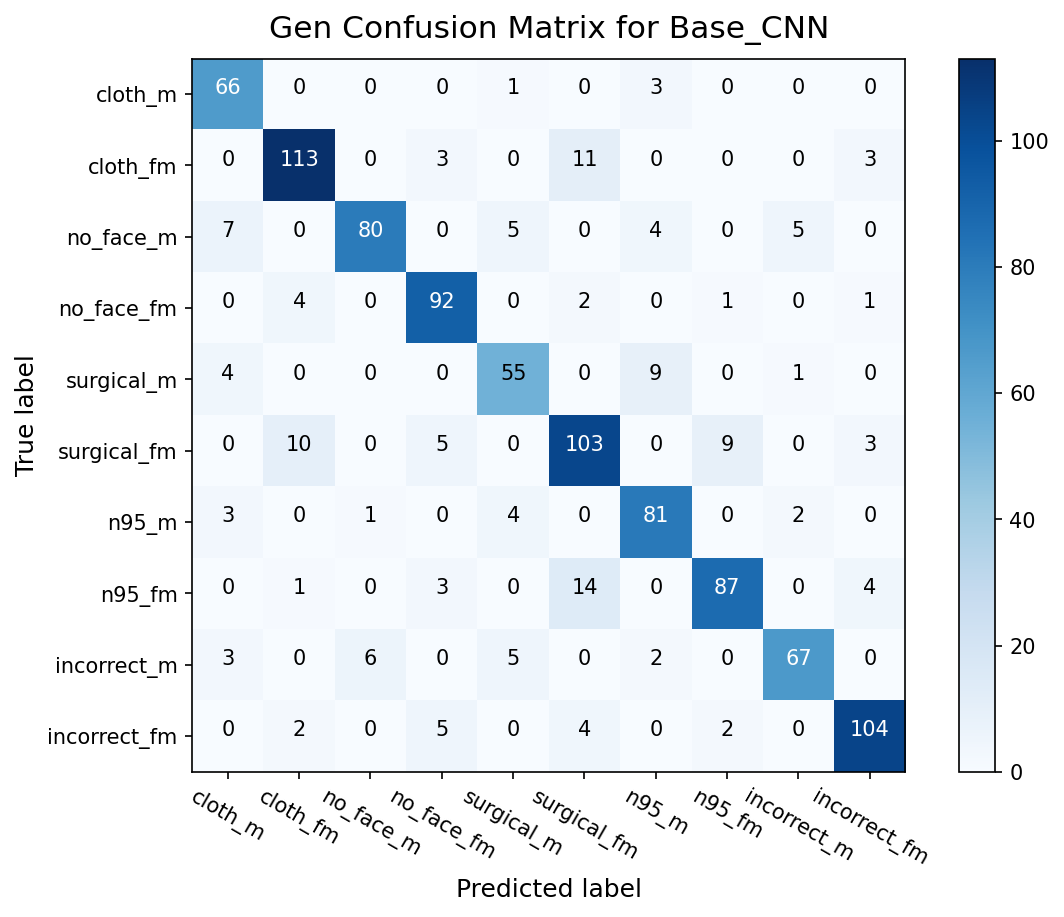

Final_Test_MetricsBase_CNN
                        class  precision    recall  f1-score
0             cloth_mask_caas   0.827160  0.899329  0.861736
1             cloth_mask_afar   0.882353  0.882353  0.882353
2           no_face_mask_caas   0.850000  0.836066  0.842975
3           no_face_mask_afar   0.933333  0.886076  0.909091
4          surgical_mask_caas   0.789474  0.779221  0.784314
5          surgical_mask_afar   0.730769  0.844444  0.783505
6               n95_mask_caas   0.833333  0.833333  0.833333
7               n95_mask_afar   0.904762  0.863636  0.883721
8  mask_worn_incorrectly_caas   0.901316  0.850932  0.875399
9  mask_worn_incorrectly_afar   0.894737  0.871795  0.883117
Overall acc:  0.848


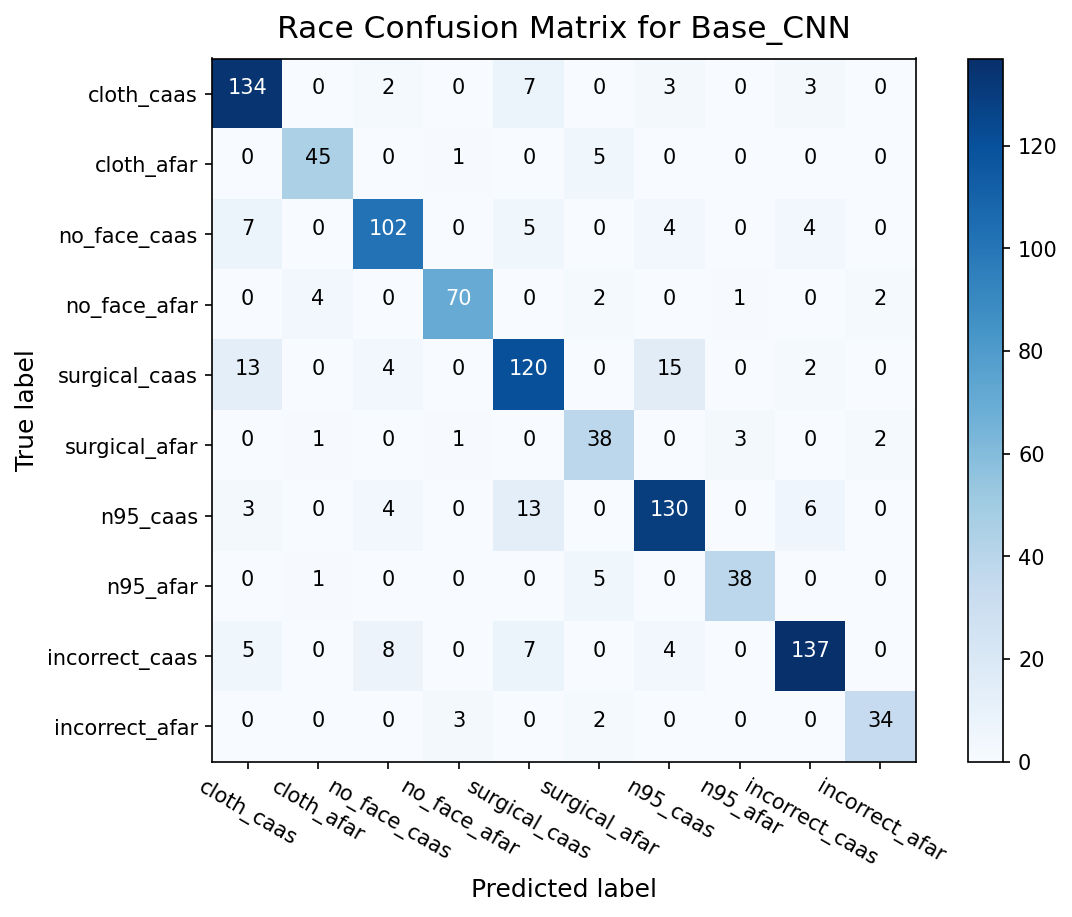

In [2]:
import itertools
import numpy as np
import os
import matplotlib.pyplot as plt
from data_process.DatasetHelper import label_map, label_map_new_gen, label_map_new_race
import pandas as pd

model_names = ['Base_CNN', 'Less_Conv', 'Less_Pooling']

# draw a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6), dpi=150)
    """
    - cm :  calculate the value of the confusion matrix
    - classes : class for every row/column
    - normalize : True:show percentage, False:show counts
    """
    if normalize:   #for calculating the percentage
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("show percentage：")
        np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #interpolation = 'nearest': when the display resolution is different with our image,
    #our script will output the image without adding other values between pixels.
    #https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
    plt.title(title, fontsize=15, pad=10) # adding our title 
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-30)#deciding what labels will be shown on x axis
    plt.yticks(tick_marks, classes)# deciding what labels will be shown on y axis
    plt.ylim(len(classes) - 0.5, -0.5)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)  #y axis label
    plt.xlabel('Predicted label', fontsize=12)  #x axis label
    plt.show()
    
    # print(cm.diagonal()/cm.sum(axis=1))

labels_name = ['cloth', 'no_face', 'surgical', 'n95', 'incorrect']
labels_name_gen = ['cloth_m', 'cloth_fm', 'no_face_m', 'no_face_fm', 'surgical_m', 'surgical_fm', 'n95_m', 'n95_fm', 'incorrect_m', 'incorrect_fm']
labels_name_race = ['cloth_caas', 'cloth_afar', 'no_face_caas', 'no_face_afar', 'surgical_caas', 'surgical_afar', 'n95_caas', 'n95_afar', 'incorrect_caas', 'incorrect_afar']

def read_socres(model_name):
    print(model_name)
    if os.path.exists(f'{model_name}.npz'):
      with open(f'{model_name}.npz', 'rb') as f:
          a = np.load(f, allow_pickle=True)
          report = a['report']
          # print(a.item().keys())
          
          df_arr = {'precision': [], 'recall': [], 'f1-score': []}
          for k in label_map.keys():
              del report.item()[label_map[k]]['support']
              for kk in report.item()[label_map[k]].keys():
                df_arr[kk].append(report.item()[label_map[k]][kk])
          df = pd.DataFrame(data=df_arr, index=labels_name)
          
          print(df)
          
          print('Overall acc: ', a['acc'])
          plot_confusion_matrix(a['conf_m'], classes=labels_name, title=f"Confusion Matrix for {model_name.replace('Final_Test_Metrics', '')}")

def read_socres_gen(model_name):
    print(model_name)
    if os.path.exists(f'{model_name}.npz'):
      with open(f'{model_name}.npz', 'rb') as f:
          a = np.load(f, allow_pickle=True)
          report = a['report_gen']
          # print(a.item().keys())
          
          df_arr = {'precision': [], 'recall': [], 'f1-score': []}
          for k in label_map_new_gen.keys():
              del report.item()[label_map_new_gen[k]]['support']
              for kk in report.item()[label_map_new_gen[k]].keys():
                df_arr[kk].append(report.item()[label_map_new_gen[k]][kk])
          df = pd.DataFrame(data=df_arr, index=labels_name_gen)
          
          print(df)
          print('Overall acc: ', a['acc'])
          plot_confusion_matrix(a['conf_m_gen'], classes=labels_name_gen, title=f"Gen Confusion Matrix for {model_name.replace('Final_Test_Metrics', '')}")


def read_socres_race(model_name):
    print(model_name)
    if os.path.exists(f'{model_name}.npz'):
      with open(f'{model_name}.npz', 'rb') as f:
          a = np.load(f, allow_pickle=True)
          report = a['report_race']
          # print(a.item().keys())
          
          df_arr = {'class': [], 'precision': [], 'recall': [], 'f1-score': []}
          for k in label_map_new_race.keys():
              del report.item()[label_map_new_race[k]]['support']
              for kk in report.item()[label_map_new_race[k]].keys():
                df_arr[kk].append(report.item()[label_map_new_race[k]][kk])
              df_arr['class'].append(label_map_new_race[k])
          df = pd.DataFrame(data=df_arr)
          
          print(df)
          print('Overall acc: ', a['acc'])
          plot_confusion_matrix(a['conf_m_race'], classes=labels_name_race, title=f"Race Confusion Matrix for {model_name.replace('Final_Test_Metrics', '')}")


for k in ['Final_Test_Metrics' + n for n in model_names]:
    print()
    read_socres(k)
    read_socres_gen(k)
    read_socres_race(k)
    break